### Development of zero-crossing functions

In [1]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter
import time
#from nptdms import TdmsFile #Process raw ramping file


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def load_sensor(dir_path, sensor, time_range = None):
    
    data = pd.DataFrame(data = {sensor: np.load(dir_path + sensor + ".npy"),
                                "time": np.load(dir_path + "time.npy")})
    
    start = min(data["time"])
    end = max(data["time"])
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    data = data[(data["time"] > start) & (data["time"] < end)]
   
    %reset -f in
    
    return data[sensor]

def load_time(dir_path, time_range = None):
    
    tdata = np.load(dir_path + "time.npy")
    
    start = min(tdata)
    end = max(tdata)
    
    if time_range:
        start = time_range[0]
        end = time_range[1]
    
    
    tdata = tdata[(tdata > start) & (tdata < end)]
   
    %reset -f in
    
    return tdata

def zero_crossings(array):
    
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()
    
    return zero_crossings


def plot_zero_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s Zero crossings".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_zero_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(zero_crossings, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")

Flushing input history
Flushing input history


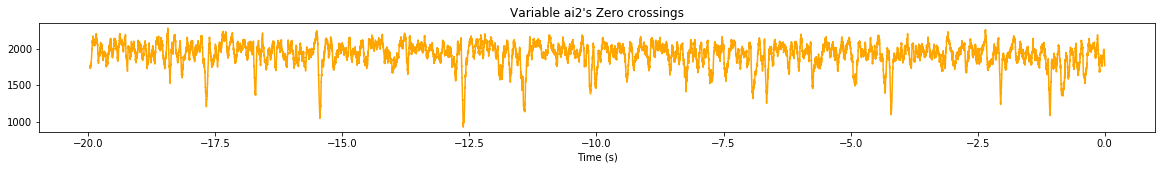

Flushing input history


In [3]:
plot_zero_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


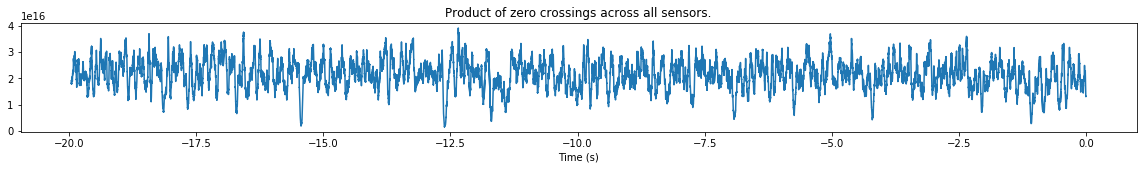

In [6]:
plot_zero_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 4000)

In [11]:
def inverse_zero(array):
    zero_crossings = ((array[:-1] * array[1:]) < 0).sum()
    
    return 1./zero_crossings

def plot_inverse_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    zero_sensor = load_sensor(dir_path, channel, time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, zero_sensor,
             label = "Number of inverse zero-crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s (1/zero crossings)".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_inverse_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).rolling(window=window).apply(inverse_zero, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of (1/zero crossings) across all sensors.")

Flushing input history
Flushing input history


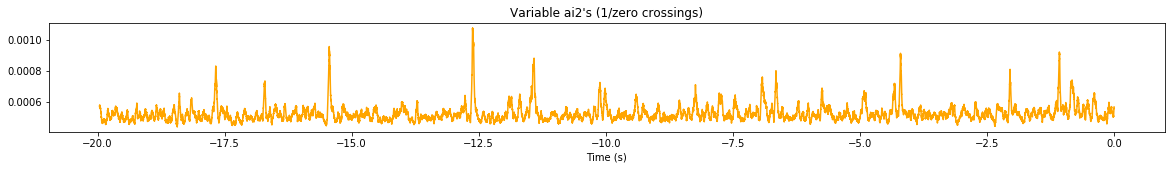

Flushing input history


In [12]:
plot_inverse_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


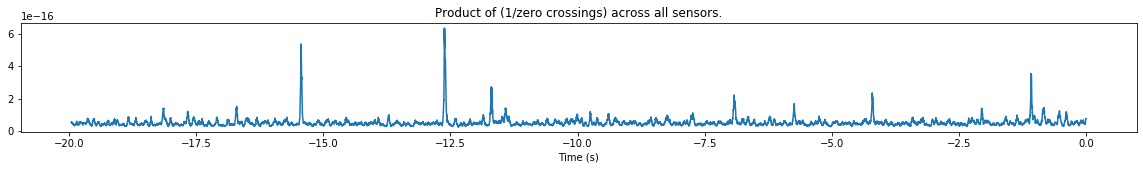

In [13]:
plot_inverse_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 4000)

## Mean crossing of abs(signal)

In [5]:
def mean_cross(array):
    mean_crossings = np.nonzero(np.diff(array > np.mean(array)))[0].size
    
    return mean_crossings/2000.

def plot_mean_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    mean_sensor = load_sensor(dir_path, channel, time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, mean_sensor,
             label = "Number of mean crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s mean crossings".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_mean_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).abs().rolling(window=window).apply(mean_cross, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of zero crossings across all sensors.")

Flushing input history
Flushing input history


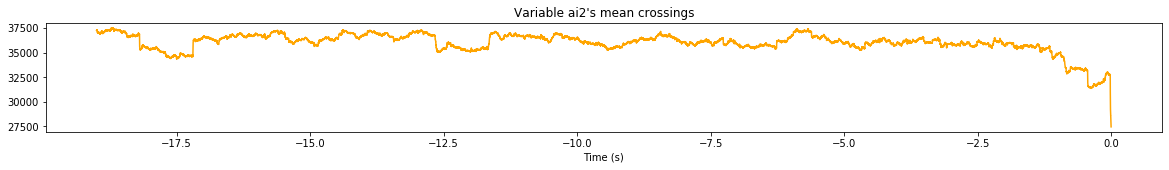

Flushing input history


In [7]:
plot_mean_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 100000)

Flushing input history
Flushing input history


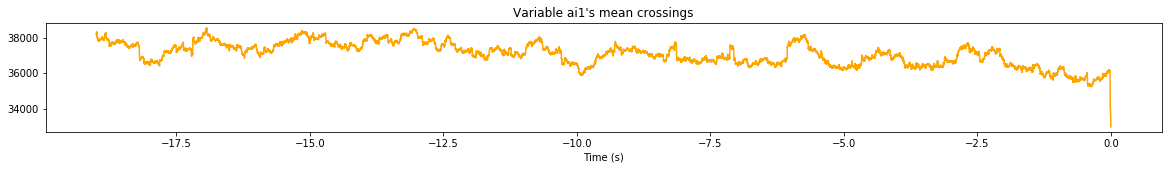

Flushing input history


In [8]:
plot_mean_crossings("./data/Ramp22/", "ai1", time_range = (-20, 0), window = 100000)

Flushing input history
Flushing input history


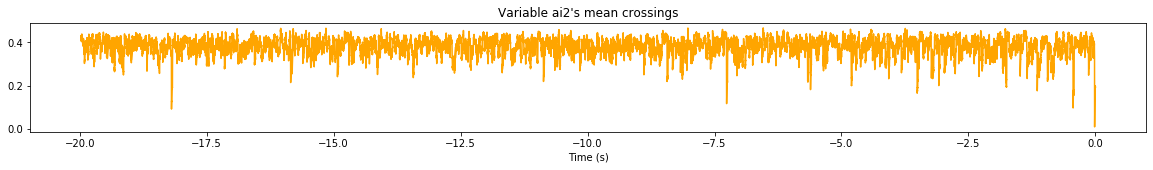

Flushing input history


In [4]:
plot_mean_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 2000)

Flushing input history
Flushing input history


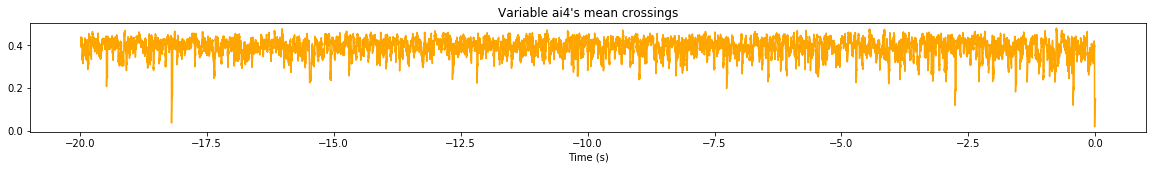

Flushing input history


In [7]:
plot_mean_crossings("./data/Ramp22/", "ai4", time_range = (-20, 0), window = 2000)

Flushing input history
Flushing input history


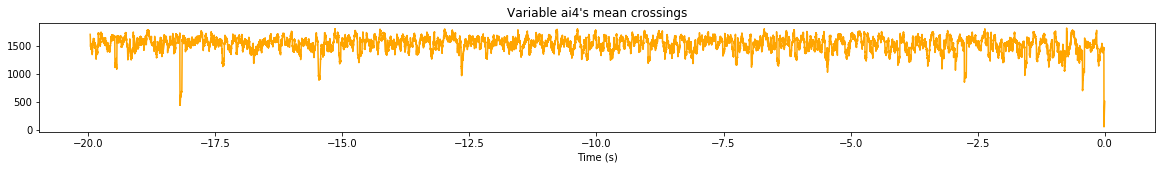

Flushing input history


In [6]:
plot_mean_crossings("./data/Ramp22/", "ai4", time_range = (-20, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


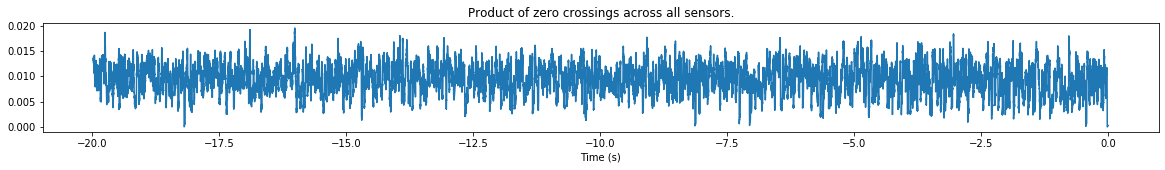

In [8]:
plot_mean_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 2000)

In [24]:
def inverse_mean_cross(array):
    mean_crossings = np.nonzero(np.diff(array > np.mean(array)))[0].size
    
    return 1./mean_crossings

def plot_inverse_mean_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    inverse_mean_sensor = load_sensor(dir_path, channel, time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, inverse_mean_sensor,
             label = "Number of inverse mean crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s mean crossings".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_inverse_mean_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).abs().rolling(window=window).apply(inverse_mean_cross, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of inverse mean crossings across all sensors.")

Flushing input history
Flushing input history


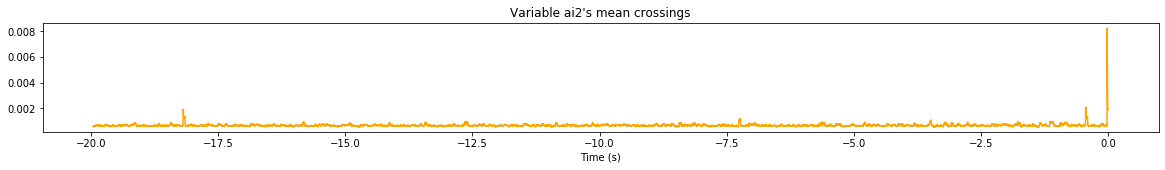

Flushing input history


In [25]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 4000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


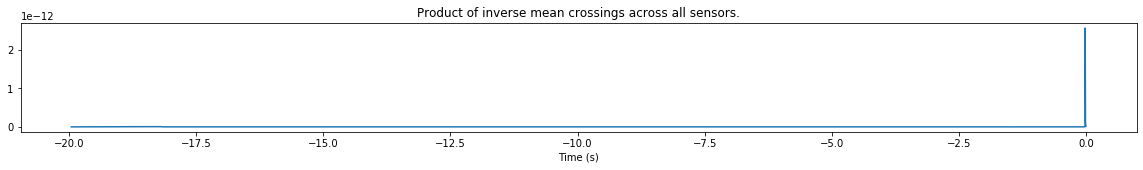

In [26]:
plot_inverse_mean_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 4000)

Flushing input history
Flushing input history


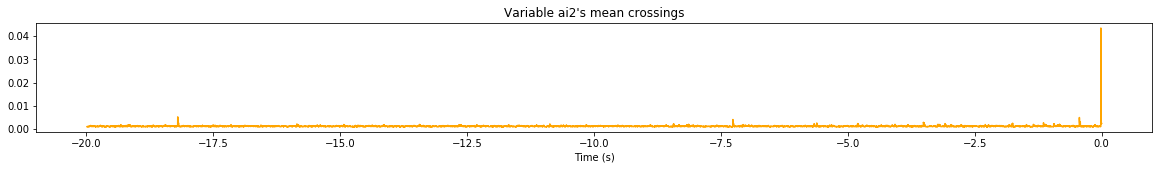

Flushing input history


In [28]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0))

Flushing input history
Flushing input history


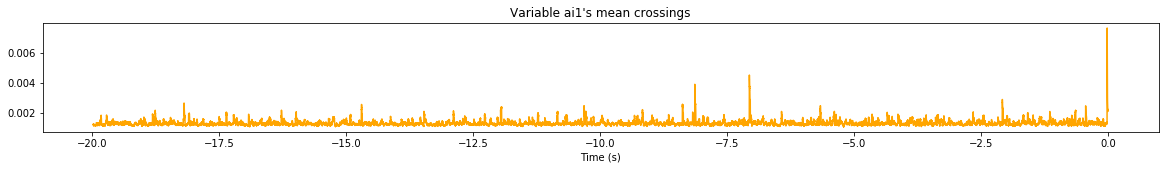

Flushing input history


In [29]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai1", time_range = (-20, 0))

Flushing input history
Flushing input history


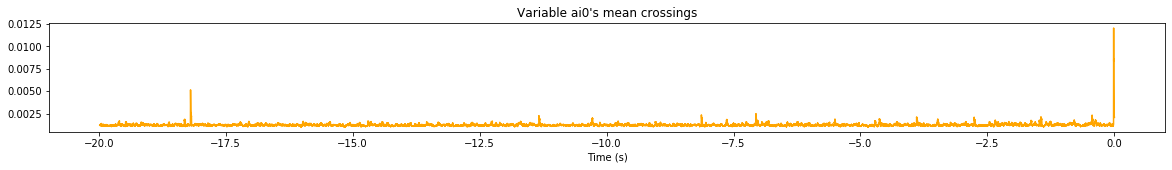

Flushing input history


In [32]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai0", time_range = (-20, 0))

Flushing input history
Flushing input history


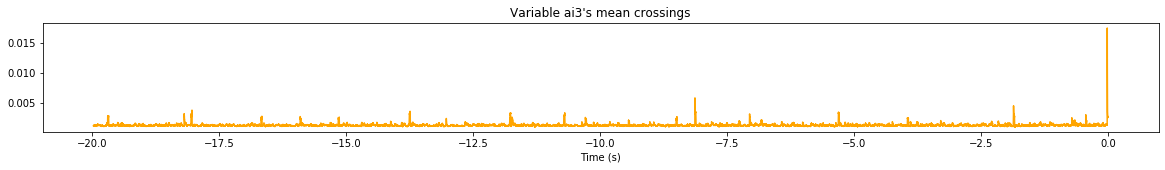

Flushing input history


In [30]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai3", time_range = (-20, 0))

Flushing input history
Flushing input history


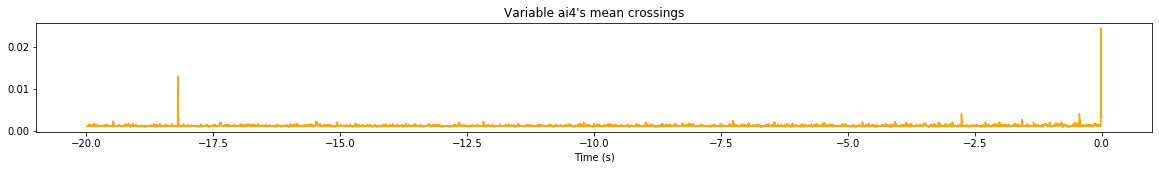

Flushing input history


In [31]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai4", time_range = (-20, 0))

In [27]:
#Smaller window

Flushing input history
Flushing input history


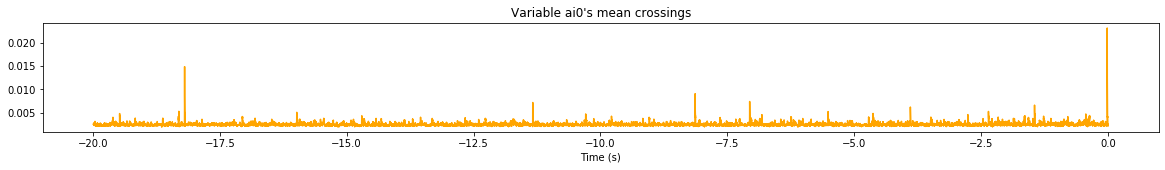

Flushing input history


In [34]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai0", time_range = (-20, 0), window = 1000)

Flushing input history
Flushing input history


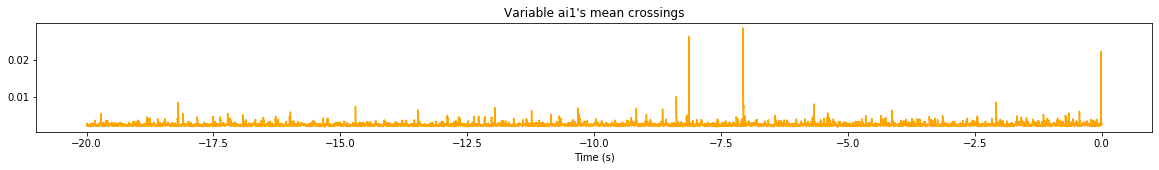

Flushing input history


In [35]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai1", time_range = (-20, 0), window = 1000)

Flushing input history
Flushing input history


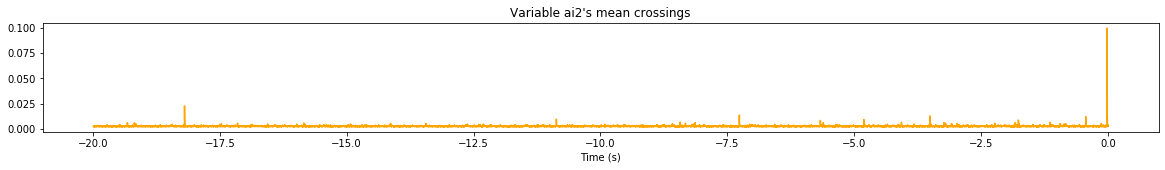

Flushing input history


In [36]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 1000)

Flushing input history
Flushing input history


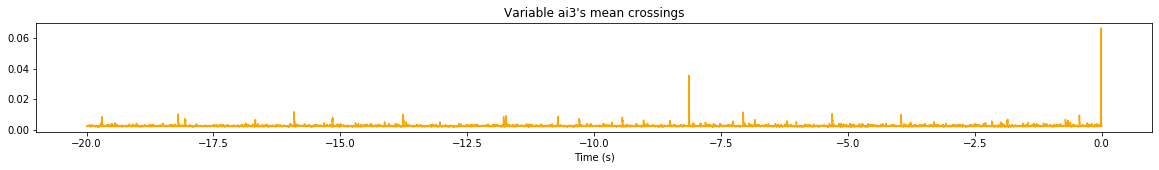

Flushing input history


In [37]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai3", time_range = (-20, 0), window = 1000)

Flushing input history
Flushing input history


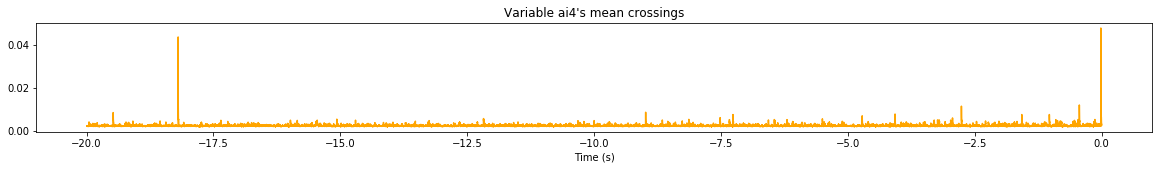

Flushing input history


In [38]:
plot_inverse_mean_crossings("./data/Ramp22/", "ai4", time_range = (-20, 0), window = 1000)

## Above threshold

In [3]:
def thres_cross(array):
    
    return (np.abs(array)> 0.01).sum()/array.size

def plot_thres_crossings(dir_path, channel, time_range = None, window = 2000, step = 10):
    
    time_axis = load_time(dir_path, time_range)[window-1::step]
    sensor = load_sensor(dir_path, channel, time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    
    #Zero crossings plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, sensor,
             label = "Number of threshold crossings",
             color = 'orange')
    plt.xlabel("Time (s)")
    plt.title("Variable {}'s threshold crossings".format(channel))
    plt.show()
    
    %reset -f in
    
def plot_thres_crossings_product(dir_path, time_range = None, window = 2000, step = 10):
    time_axis = load_time(dir_path, time_range)[window-1::step]
    ai0 = load_sensor(dir_path, "ai0", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai1 = load_sensor(dir_path, "ai1", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai2 = load_sensor(dir_path, "ai2", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai3 = load_sensor(dir_path, "ai3", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    ai4 = load_sensor(dir_path, "ai4", time_range = time_range).abs().rolling(window=window).apply(thres_cross, raw = True).to_numpy()[window-1::step]
    
    product = ai0*ai1*ai2*ai3*ai4
    
    #Plot
    plt.figure(figsize=(20,2))
    plt.plot(time_axis, product)
    plt.xlabel("Time (s)")
    plt.title("Product of thres hold crossings across all sensors.")

Flushing input history
Flushing input history


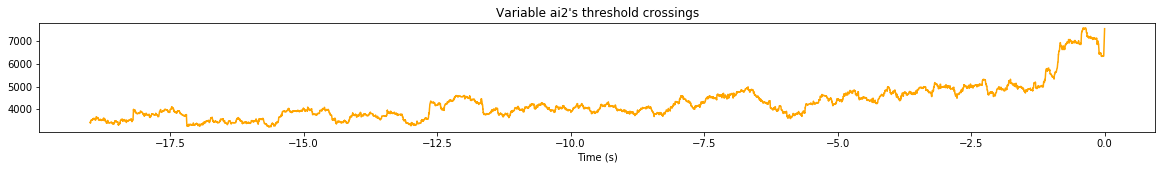

Flushing input history


In [17]:
plot_thres_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 100000)

Flushing input history
Flushing input history


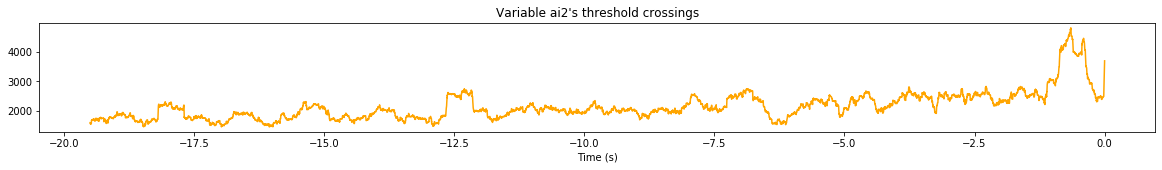

Flushing input history


In [18]:
plot_thres_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 50000)

Flushing input history
Flushing input history


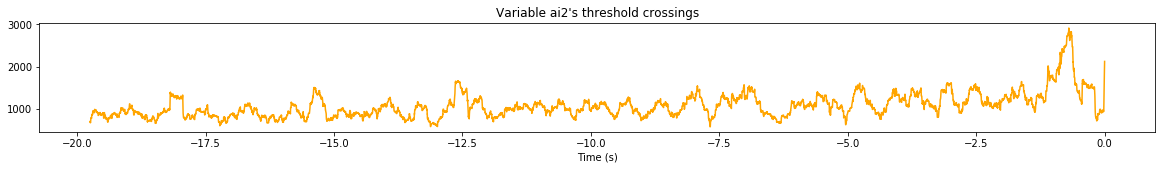

Flushing input history


In [19]:
plot_thres_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 25000)

Flushing input history
Flushing input history


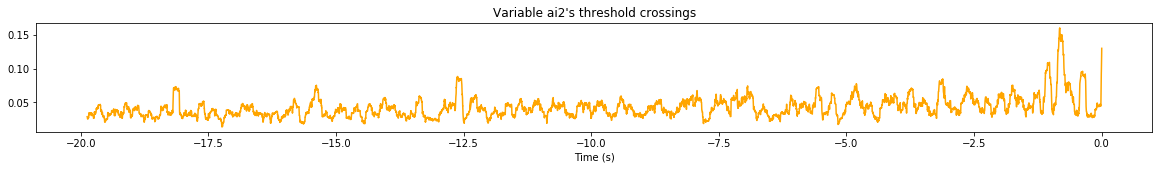

Flushing input history


In [12]:
plot_thres_crossings("./data/Ramp22/", "ai2", time_range = (-20, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


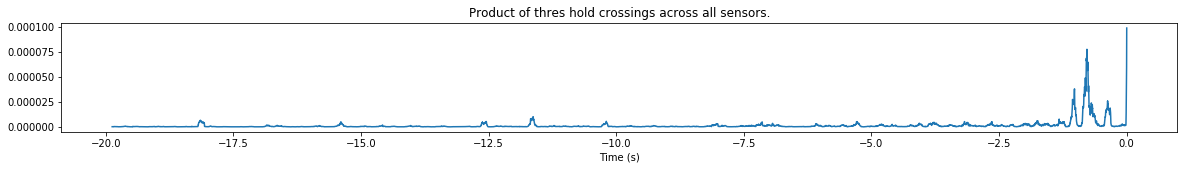

In [13]:
plot_thres_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


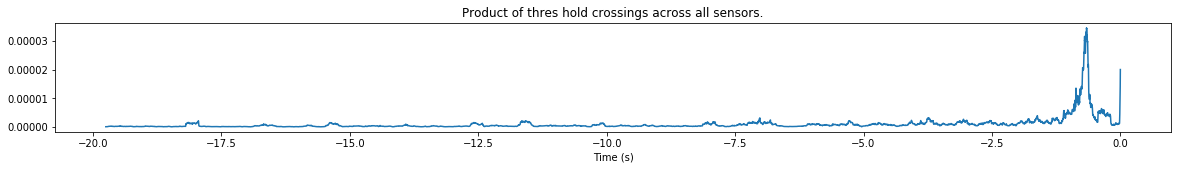

In [7]:
plot_thres_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


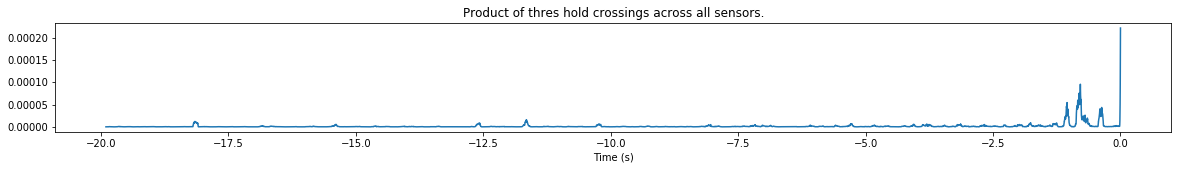

In [4]:
plot_thres_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 10000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


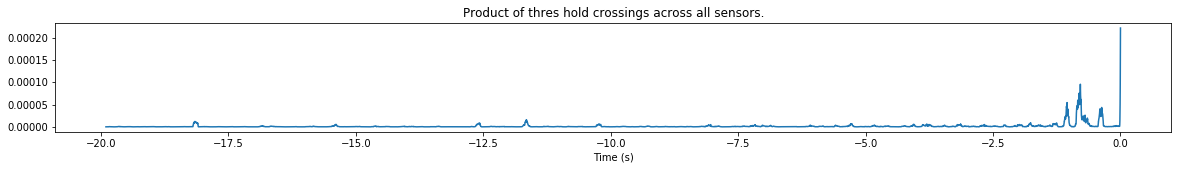

In [4]:
plot_thres_crossings_product("./data/Ramp22/", time_range = (-20, 0), window = 20000)

Flushing input history
Flushing input history


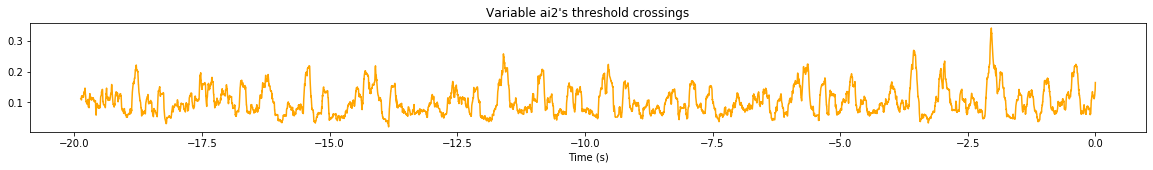

Flushing input history


In [5]:
plot_thres_crossings("./data/Ramp20/", "ai2", time_range = (-20, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


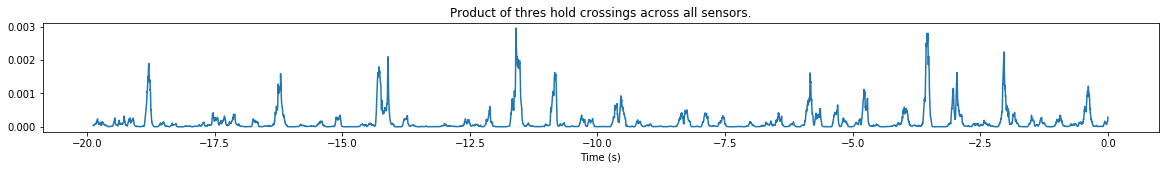

In [6]:
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


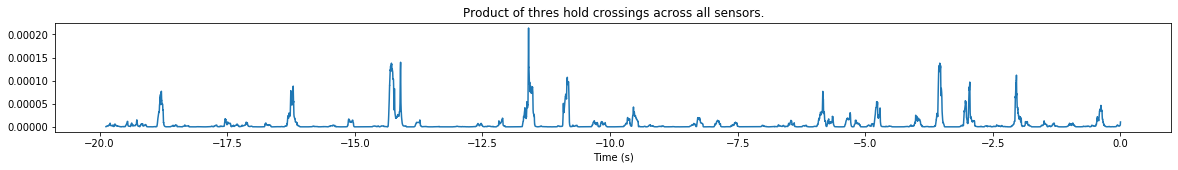

In [10]:
#Threshold 0.15
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 12500)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


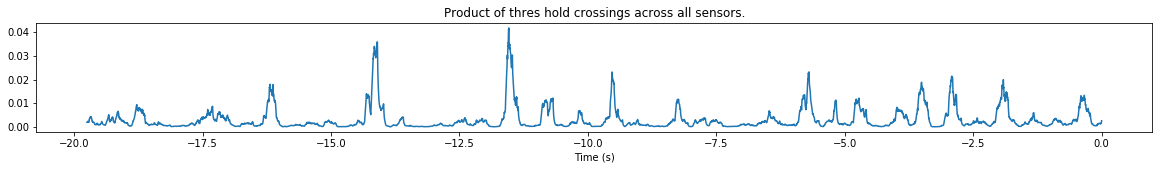

In [7]:
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 25000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


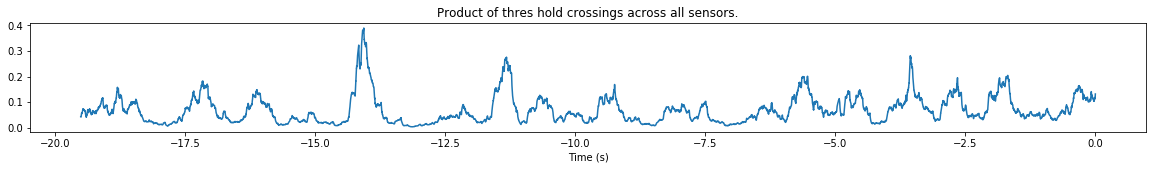

In [8]:
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 50000)

Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history
Flushing input history


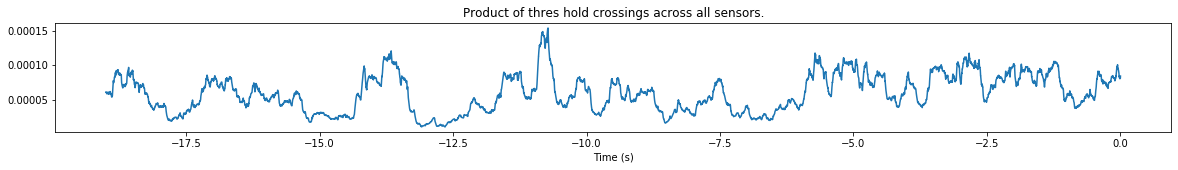

In [6]:
plot_thres_crossings_product("./data/Ramp20/", time_range = (-20, 0), window = 100000)

## Above threshold -- distribution plot of abs(signal).